In [58]:
function escapetime(z, c, lim, maxit)
    for n = 1:maxit
        abs(z) > lim && return n
        z = z*z + c
    end
    return maxit
end

escapetime (generic function with 1 method)

In [86]:
function juliaset(x , y , c, lim , maxit )  
    nx = length(x)
    ny = length(y)
    julia = zeros(UInt8, (nx, ny))
    for i in eachindex(x), j in eachindex(y)
        z  = x[i] + 1im * y[j] 
        julia[j, i] = escapetime(z, c, lim, maxit)
    end
    return julia
end

juliaset (generic function with 1 method)

In [87]:
nx, ny = 512, 512
lim = 400
maxit = 100

x = LinRange(-1.6, 1.6, nx)
y = LinRange(-1.6, 1.6, ny)

c = -0.772691322542185 + 0.124281466072787im
juliaset(x , y , c, lim , maxit ) 

512×512 Matrix{UInt8}:
 0x04  0x04  0x04  0x04  0x04  0x04  …  0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04  …  0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04  …  0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
 0x04  0x04  0x04  0x04  0x04  0x04     0x04  0x04  0x04  0x04  0x04  0x04
  

In [88]:
using Colors, Images

const cmap = convert(Vector{RGB{N0f8}}, colormap("RdBu", maxit))

In [61]:
typeof(cmap)

Vector{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 1})

In [62]:
dump(cmap[end-3])

RGB{N0f8}
  r: N0f8
    i: UInt8 0x13
  g: N0f8
    i: UInt8 0x3f
  b: N0f8
    i: UInt8 0x76


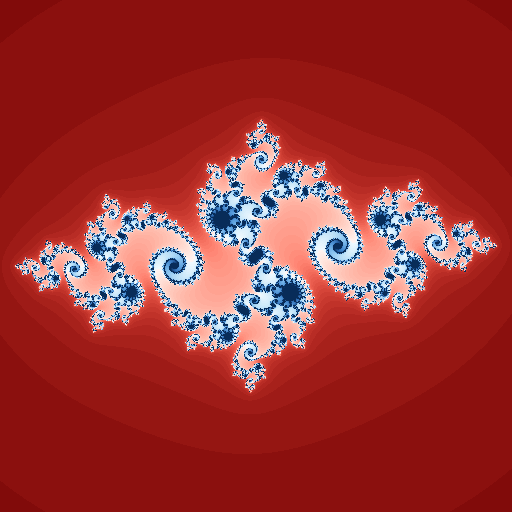

In [89]:
cmap[juliaset(x , y , c, lim , maxit )]

In [90]:
using BenchmarkTools

@benchmark juliaset($x , $y , $c, $lim , $maxit )

BenchmarkTools.Trial: 115 samples with 1 evaluation.
 Range (min … max):  40.436 ms … 53.445 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     43.095 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   43.490 ms ±  1.850 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

            ▅█▅▃▁ ▃                                            
  ▅▃▁▁▁▃▃▃▇█████████▄▁▅▄▃▁▃▄▁▁▃▃▁▃▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▃ ▃
  40.4 ms         Histogram: frequency by time        52.5 ms <

 Memory estimate: 256.11 KiB, allocs estimate: 2.

In [93]:
julia = zeros(UInt8, (nx, ny))
    
function juliaset!(julia, x , y , c, lim , maxit )
    for i in eachindex(x)
         for j in eachindex(y)
             z  = x[i] + 1im * y[j] 
             julia[j, i] = escapetime(z, c, lim, maxit)
        end
    end
end

juliaset! (generic function with 1 method)

In [95]:
@benchmark juliaset!($julia, $x, $y, $c, $lim, $maxit)

BenchmarkTools.Trial: 117 samples with 1 evaluation.
 Range (min … max):  40.918 ms …  45.852 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     42.644 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   42.818 ms ± 892.529 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

               ▂▂ ▃▂▂█▆   ▅  ▂    ▂                             
  ▄▄▁▁▄▁▁▁▄▁▄▄▄████████▅▇██▇▅██▇▁▄█▇▁▇▄▅▄▁▅▁▁▅▁▁▁▇▁▄▅▁▁▄▁▁▄▁▁▄ ▄
  40.9 ms         Histogram: frequency by time         45.4 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [83]:
nthreads()

4

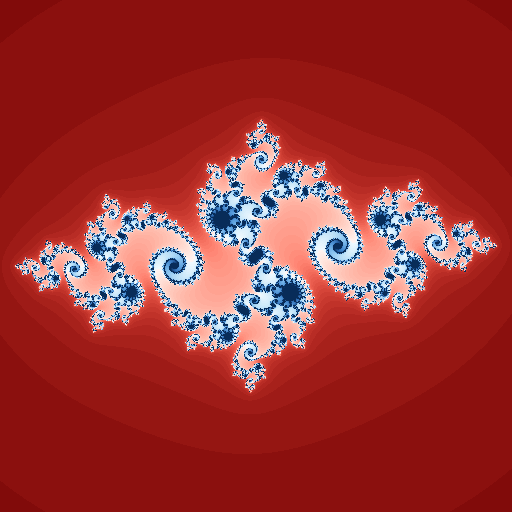

In [96]:
cmap[julia]